# 1.  Import Libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


# 2. Import data

In [9]:
df=pd.read_csv("ari_test/new/USA_Housing.csv")

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [20]:
from sklearn import linear_model

In [28]:
df.shape

(5000, 7)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [35]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [49]:
x=df.loc[:,['Avg. Area Income',"Avg. Area House Age","Avg. Area Number of Rooms","Avg. Area Number of Bedrooms","Area Population"]]

In [50]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [42]:
y=df.Price

# 3. Exploratory Data Anaysis


In [ ]:
#1. Check if the independent and the dependent variables are normally distributed.
#2. Check if there are any outliers present in the data.
#3. Check the correlation between variables.

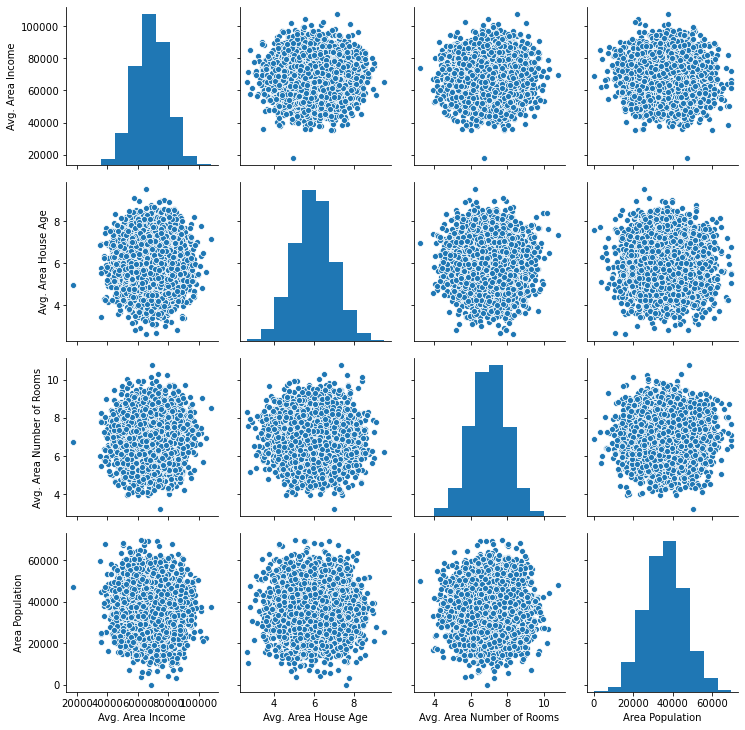

In [43]:
sns.pairplot(x)

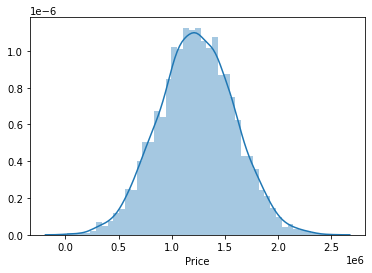

In [36]:
sns.distplot(y)

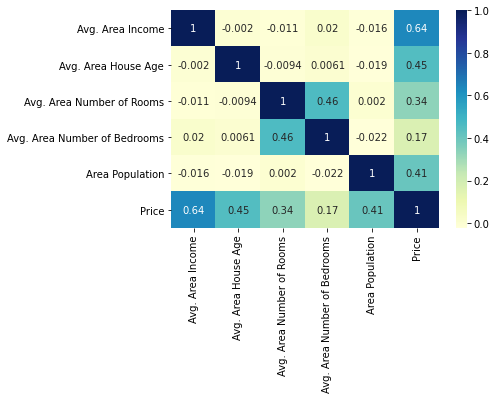

In [48]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

# 4. Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# 5. Creating and Training the Model

In [61]:
from sklearn import linear_model

In [ ]:
reg=linear_model.LinearRegression()

In [62]:
reg.fit(x_train,y_train)

LinearRegression()

# 6. Model Evaluation

In [65]:
coeff=reg.coef_

In [66]:
coeff

array([2.15898874e+01, 1.66102501e+05, 1.19895936e+05, 1.90107101e+03,
       1.52315025e+01])

In [67]:
intercept=reg.intercept_

In [68]:
intercept

-2638142.110430866

In [80]:
coeff_df = pd.DataFrame(coeff,columns=["Coefficients"],index=[x.columns])

In [82]:
coeff_df

,Coefficients
Avg. Area Income,21.589887
Avg. Area House Age,166102.501246
Avg. Area Number of Rooms,119895.936402
Avg. Area Number of Bedrooms,1901.071012
Area Population,15.231503


### Interpreting the coefficients:

In [102]:
#1 unit increase in Avg. Area Income is associated with an increase in price by $21.52 
#1 unit increase in Avg. Area House Age is associated with an increase in price by $164883.28 
#1 unit increase in Avg. Area Number of Rooms is associated with an increase in price by$122368.67 
#1 unit increase in Avg. Area Number of Bedrooms is associated with an increase in price by $2233.80 
#1 unit increase in Area Population is associated with an increase in price by  $15.15 

# 7.Predictions from our Model

In [85]:
y_predict=reg.predict(x_test)

In [86]:
y_predict

array([1310035.96931603, 1238811.85458566, 1245265.83079117, ...,
       1024496.94962097, 1548581.80349726, 1032639.16178956])

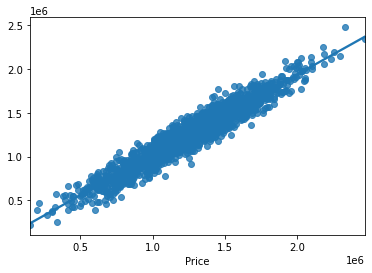

In [97]:
sns.regplot(y_test,y_predict)

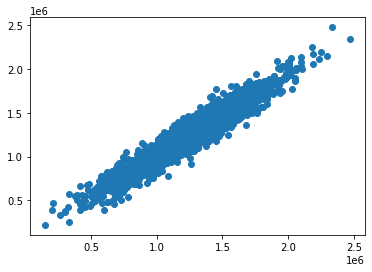

In [101]:
plt.scatter(y_test,y_predict)

# 8. Residual Analysis

### Residual Histogram

In [92]:
residuals=y_predict-y_test

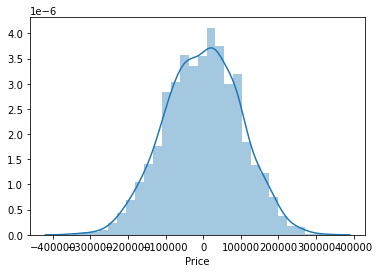

In [93]:
sns.distplot(residuals)

### Residual plot

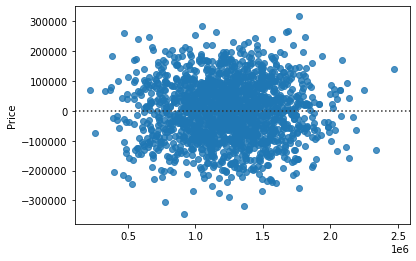

In [99]:
sns.residplot(y_predict,residuals)

## Interpretation of a residual plot :


In [104]:
#The values are randomly scattered without any specific pattern. 
#The values follow a normal distribution the predictions are correct.

# 9. Regression Evaluation


In [106]:
#All of these are loss functions, because we want to minimize them.
#MSE Mean square error
#RMSE Root mean square error
#AMSE Absolute mean square error

In [107]:
from sklearn import metrics 

### Loss functions

In [117]:
MSE = metrics.mean_squared_error(y_test,y_predict)
MSE

10013679978.583366

In [118]:
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_predict))
RMSE

100068.37651617701

In [116]:
AMSE=metrics.mean_absolute_error(y_test,y_predict)
AMSE

80893.81190770479

### R2 goodness-of-fit 

In [120]:
r2_score=metrics.r2_score(y_test,y_predict)

In [121]:
r2_score

0.916533472413823